In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_length    = 0.1
dx          = 0.001
n_x         = int(x_length / dx) + 1
x           = np.linspace(0, x_length, n_x, endpoint=True)

t_length    = 100.
dt          = 0.01
n_t         = int(t_length / dt)
# Constants
alpha       = 1e-5
# Initial/Boundary conditions
T_all_init  = 100
T_source    = 0

In [3]:
T_new = np.ones(shape=n_x) * T_all_init
Ts = [T_new]

for i_t in range(n_t-1):
    T_new = np.zeros(shape=n_x)
    T_new[1:-1] = Ts[i_t][1:-1] + alpha * dt * ((Ts[i_t][2:] - 2 * Ts[i_t][1:-1] + Ts[i_t][:-2]) / dx**2)
    # Boundary conditions
    T_new[0] = T_source
    T_new[-1] = T_new[-2]
    Ts.append(T_new)

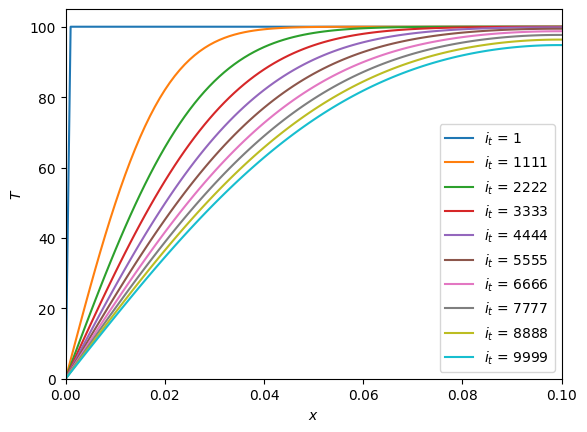

In [4]:
fig, ax = plt.subplots(dpi=100)

for i in np.linspace(1, len(Ts)-1, 10, dtype=int):
    ax.plot(x, Ts[i], label=r'$i_t$ = {:.0f}'.format(i))

ax.set_xlim(x[0], x[-1])
ax.set_ylim(bottom=0)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$T$')
ax.legend()
fig.savefig('out.jpg', dpi=150, bbox_inches='tight')